C:\Users\김보경\AppData\Local\conda\conda\envs\venv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\김보경\AppData\Local\conda\conda\envs\venv\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\김보경\AppData\Local\conda\conda\envs\venv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


(1)
theta_best by normal equation :
[[4.60682037]
 [2.90130387]]
(2)
y_predict by normal equation :
[[ 4.60682037]
 [10.40942811]]
(3)
y_predict by linear regression :
[[ 4.60682037]
 [10.40942811]]


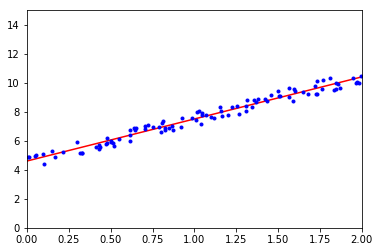

In [1]:
# linerar regression_normal equation (선형 정규방정식) 코드
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

#랜덤 데이터 생성

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)


#정규방정식(normal equation)에 의한 예측
X_b = np.c_[np.ones((100, 1)), X]                            #모든 샘플에 x0 = 1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #정규방정식을 사용하여 theta를 계산

print("(1)")
print('theta_best by normal equation :')
print(theta_best)

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] #모든 샘플에 x0 = 1을 추가
y_predict = X_new_b.dot(theta_best)

print("(2)")
print('y_predict by normal equation :')
print(y_predict)


#선형 회귀(linear regression) 모델에 의한 예측

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

y_predict_reg = lin_reg.predict(X_new)

print("(3)")
print("y_predict by linear regression :")
print(y_predict_reg)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

theta by batch gradient descent :
[[4.52744222]
 [2.94651532]]
y_predict by linear regression :
[[ 4.52744222]
 [10.42047286]]


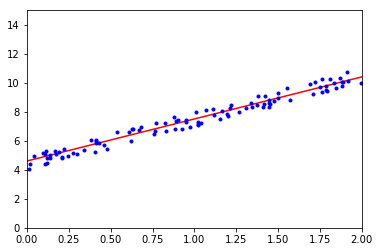

In [2]:
# batch_gradient descent (배치 경사 하강법) 코드

from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

#랜덤 데이터 생성

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)


#미니 배치 경사 하강법으로 theta 구하기
X_b = np.c_[np.ones((100, 1)), X]        #모든 샘플에 x0 = 1을 추가

eta = 0.1                                #학습률 설정
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)             #램덤 초기화
for interation in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print("theta by batch gradient descent :")
print(theta)


#선형 회귀(linear regression) 모델에 의한 예측

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

y_predict_reg = lin_reg.predict(X_new)

print("y_predict by linear regression :")
print(y_predict_reg)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

theta by SGD(Stochastic Gradient Descent) :
[[4.52845598]
 [2.95420952]]
y_predict by SGDRegressor :
[ 4.4888766  10.43501132]


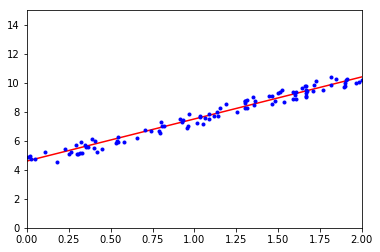

In [3]:
# SGD (확률적 경사 하강법) 코드

from sklearn.linear_model import SGDRegressor
import numpy as np
import matplotlib.pyplot as plt

#랜덤 데이터 생성

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)


#확률적 경사 하강법(SGD)으로 theta 구하기
X_b = np.c_[np.ones((100, 1)), X]        #모든 샘플에 x0 = 1을 추가

n_epochs = 50
t0, t1 = 5, 10                           #학습 스케쥴 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)             #램덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print("theta by SGD(Stochastic Gradient Descent) :")
print(theta)


#SGDRegressor 모델에 의한 예측

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

y_predict_reg = sgd_reg.predict(X_new)

print("y_predict by SGDRegressor :")
print(y_predict_reg)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
#logisticreg(로지스틱 회귀 모델) 코드

from sklearn import datasets
from sklearn.linear_model import LogisticRegression

import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
list(iris.keys())

X = iris["data"][:, 3:]                    #꽃잎의 너비
y = (iris["target"] == 2).astype(np.int)   #1 Iris-Verginica면 1, 그렇지 않으면 0

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Vriginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Iris-Virginica 아님")

log_reg.predict([[1.7], [1.5]])

print("log_reg.pridict:")
print(log_reg.predict)


log_reg.pridict:
<bound method LinearClassifierMixin.predict of LogisticRegression(solver='liblinear')>
